# Model Training

## 1.1 import Data and Requirements packages

In [4]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

import the CSV Data as Pandas DataFrame

In [5]:
df=pd.read_csv('raw.csv')

show top 5 records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


preparing X and Y variables

In [7]:
X=df.drop(columns=['math_score'],axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [15]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print("categories in race_ethinicity variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
categories in race_ethinicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [16]:
Y=df['math_score']

In [17]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [19]:
# create column transformer with 3 type of transformewer
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [20]:
X = preprocessor.fit_transform(X)

In [21]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [22]:
X.shape

(1000, 19)

Seperating the dataset into train and test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

Create an Evaluate Function to give all metric after model Training

In [24]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae, mse, rmse, r2_square

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Descision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor": SVR()
}

model_list = []
r2_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate the model on train and test data
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance on train data:")
    print("- Root Mean Squared Error: {:.2f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.2f}".format(model_train_mae))
    print("- R2 Score: {:.2f}".format(model_train_r2))

    print('-------------------------------------------------------')
    print("Model performance on test data:")
    print("- Root Mean Squared Error: {:.2f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.2f}".format(model_test_mae))
    print("- R2 Score: {:.2f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 50)
    print('\n')



Linear Regression
Model performance on train data:
- Root Mean Squared Error: 5.32
- Mean Absolute Error: 4.27
- R2 Score: 0.87
-------------------------------------------------------
Model performance on test data:
- Root Mean Squared Error: 5.39
- Mean Absolute Error: 4.21
- R2 Score: 0.88


Lasso
Model performance on train data:
- Root Mean Squared Error: 6.59
- Mean Absolute Error: 5.21
- R2 Score: 0.81
-------------------------------------------------------
Model performance on test data:
- Root Mean Squared Error: 6.52
- Mean Absolute Error: 5.16
- R2 Score: 0.83


Ridge
Model performance on train data:
- Root Mean Squared Error: 5.32
- Mean Absolute Error: 4.26
- R2 Score: 0.87
-------------------------------------------------------
Model performance on test data:
- Root Mean Squared Error: 5.39
- Mean Absolute Error: 4.21
- R2 Score: 0.88


K-Neighbors Regressor
Model performance on train data:
- Root Mean Squared Error: 5.71
- Mean Absolute Error: 4.52
- R2 Score: 0.86
-------

Results

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest,0.853606
7,CatBoost,0.851632
8,AdaBoost,0.849957
6,XGBoost,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
9,Support Vector Regressor,0.728600
4,Descision Tree,0.716239


Linear Regression

In [28]:
lin_model = LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"R2 score of Linear Regression model is: {score:.2f}%")

R2 score of Linear Regression model is: 88.04%


Plot y_pred and y_test

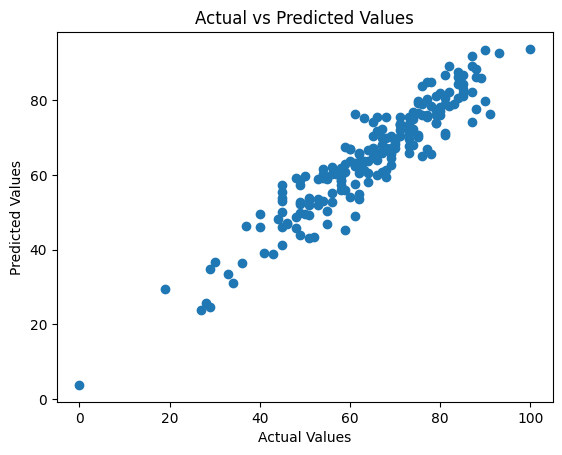

In [29]:
plt.scatter(y_test, y_pred);
plt.xlabel("Actual Values");
plt.ylabel("Predicted Values");
plt.title("Actual vs Predicted Values");

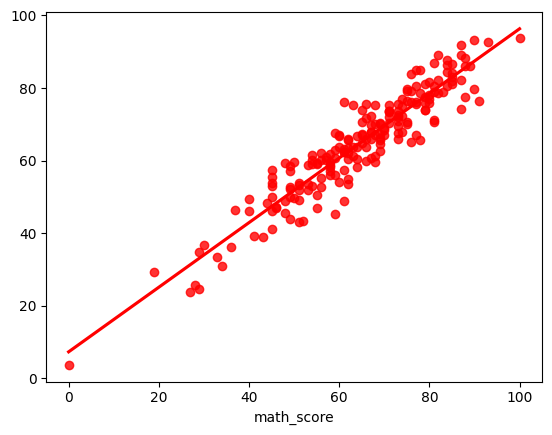

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
